<a href="https://colab.research.google.com/github/cdmafAdi/DL_NOTES-/blob/DL_YT_NOTES/27_imagenet_classifer/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow_hub

In [153]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [154]:
import tensorflow as tf
import tensorflow_hub as hub

In [155]:
class HubLayer(tf.keras.layers.Layer):
    def __init__(self, url, input_shape):
        super().__init__()
        self.hub_layer = hub.KerasLayer(url, input_shape=input_shape)

    def call(self, x):
        return self.hub_layer(x)

model = tf.keras.Sequential([
    HubLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/classification/5",
             input_shape=(224, 224, 3))
])



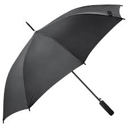

In [188]:
gold_fish = Image.open('/content/umbrella.jfif').resize((128, 128))
gold_fish

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
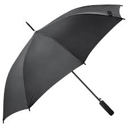

In [189]:
np.array(gold_fish)

In [190]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(128, 128, 3)

here we will add another dimension (1) in order for for prediction

In [191]:
gold_fish[np.newaxis, ...].shape

(1, 128, 128, 3)

now let's preict total classes

In [192]:
result = model.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


(1, 1001)

In [193]:
predic_class  = np.argmax(result)

predic_class

np.int64(880)

np.int64(2) we have got class 2 in return lets match this with classes

In [194]:
with  open ('data-file.csv','r') as f:
    image_labels  = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [195]:
image_labels[predic_class]

'umbrella'